In [84]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from csv import reader as rdr
from sklearn.model_selection import GridSearchCV
from collections import Counter
warnings.filterwarnings( "ignore" )

In [85]:
# Reading the Dataset
def read_dataset(filename):
  df = pd.read_csv(filename)
  return df

# Replacing string values
def replace_string_values(val):
  if(val == 'SE'):
    return 0
  elif(val == 'NW'):
    return 1
  elif(val == 'NE'):
    return 2
  else:
    return 3

def preprocess_data(filename):
  df = read_dataset(filename)
  df = df.drop(columns = ['No'],axis = 1)
  df = df.drop(0)
  df = df.dropna()
  df['cbwd'] = df['cbwd'].apply(replace_string_values)
  df = df.iloc[np.random.RandomState(seed=0).permutation(len(data_set))]
  return df
# 70:15:15 split
def dataset_split(df):
  dataset_split = np.split(df,[int(0.7*len(df)),int(0.85*len(df))])
  return dataset_split[0],dataset_split[1],dataset_split[2]

# getting training testing and validation set
def get_training_test_validation_set(filename):
  df = preprocess_data(filename)
  x_cols = ['year','day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd','Iws', 'Is', 'Ir']
  x_df = df[x_cols]
  y_df = df['month']
  x_train,x_test,x_validate = dataset_split(x_df)
  y_train,y_test,y_validate = dataset_split(y_df)
  return x_train,x_test,x_validate,y_train,y_test,y_validate

x_train,x_test,x_validate,y_train,y_test,y_validate = get_training_test_validation_set("/content/question_1_data.csv")

In [86]:
class Evaluation:
  # To get Confusion matrix
  def confusionMatrix(self, actual_output, predicted_output):
    true_positive = 0
    true_negatives = 0
    false_positives = 0
    false_negative = 0

    assert len(actual_output) == len(predicted_output)
    i = 0
    while(i < len(actual_output)):
      if((actual_output[i] == 1) and (predicted_output[i] == 1)):
        true_positive += 1
      if((actual_output[i] == 1) and (predicted_output[i] == 0)):
        true_negatives += 1
      if((actual_output[i] == 0) and (predicted_output[i] == 1)):
        false_positives += 1
      if((actual_output[i] == 0) and (predicted_output[i] == 0)):
        false_negative += 1
      i += 1
    
    return true_positive,true_negatives,false_positives,false_negative

  # To get accuracy score
  def accuracyScore(self, true_positive, true_negatives, false_positives, false_negative):
    return (true_positive + true_negatives) / (true_positive + true_negatives + false_positives + false_negative)
  
  def accuracy2(self,actual_output,predicted_output):
    assert len(actual_output) == len(predicted_output)
    correctPred = 0
    totalPred = 0
    for i in range(0,len(actual_output)):
      if(int(actual_output[i]) == int(predicted_output[i])):
        correctPred += 1
      totalPred += 1
    return correctPred/totalPred

  # To get recall score
  def recallScore(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (true_positive) / (true_positive + false_negative)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")

  # To get prcision Score
  def precisionScore(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (true_positive) / (true_positive + false_positives)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")
  
  # To get F1 score
  def F1Score(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (2 * true_positive) / ((2 * true_positive) + false_positives + false_negative)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")

In [87]:
# Decision tree based on criteria
def decisionTree(criteria,depth,x_train,y_train):
  if(depth == None):
    dTree = DecisionTreeClassifier(criterion=criteria)
    dTree = dTree.fit(x_train,y_train);
    return dTree
  else:
    dTree = DecisionTreeClassifier(criterion=criteria,max_depth=depth)
    dTree = dTree.fit(x_train,y_train)
    return dTree


In [88]:
# Random Forest
def randomForest(depth,test_set):
  training_set = pd.concat([x_train,y_train],axis = 1)
  result = {}
  y_test_pred_vals = []
  i = 0
  while(i<100):
    x_cols = ['year','day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd','Iws', 'Is', 'Ir']
    training_set = training_set.iloc[numpy.random.RandomState(seed=42).permutation(len(training_set))]
    random_half_set = training_set.iloc[:int(len(training_set)/2),:]
    random_half_set_x_train = random_half_set[x_cols]
    random_half_set_y_train = random_half_set['month']
    dTreeTmp = decisionTree('entropy',depth,random_half_set_x_train,random_half_set_y_train)
    tmpYPred = dTreeTmp.predict(test_set)
    for j in range(0,len(test_set)):
      if(j not in result.keys()):
        result[j] = []        
      result[j].append(tmpYPred[j])
    i+=1
  final_predictions = []
  for i in range(len(result)):
    votes = Counter(result[i])
    final_predictions.append(votes.most_common()[0][0])
  return final_predictions
  # for val in result.keys():
  #   y_test_pred_vals.append()  

ACCURACY SCORE USING GINI INDEX:  0.8033205619412516
ACCURACY SCORE USING ENTROPY INDEX:  0.8365261813537676



TRAINING ACCURACY FOR 2 DEPTH = 0.27376920182011016
TEST ACCURACY FOR 2 DEPTH = 0.27346743295019155

TRAINING ACCURACY FOR 4 DEPTH = 0.39984262205344007
TEST ACCURACY FOR 4 DEPTH = 0.39351851851851855

TRAINING ACCURACY FOR 8 DEPTH = 0.5765506859625714
TEST ACCURACY FOR 8 DEPTH = 0.5673690932311622

TRAINING ACCURACY FOR 10 DEPTH = 0.708611310684594
TEST ACCURACY FOR 10 DEPTH = 0.6574074074074074

TRAINING ACCURACY FOR 15 DEPTH = 0.9537445687502139
TEST ACCURACY FOR 15 DEPTH = 0.8170498084291188

TRAINING ACCURACY FOR 30 DEPTH = 1.0
TEST ACCURACY FOR 30 DEPTH = 0.8358876117496807



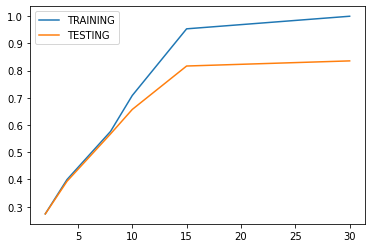




ACCURACY SCORE FOR TEST SET FOR DEPTH OF 3: 0.34738186462324394



ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF 4 : 0.4124670703753122
ACCURACY SCORE FOR TEST SET FOR DEPTH OF 4 : 0.40676883780332057
ACCURACY SCORE FOR VALIDATION SET FOR DEPTH OF 4 : 0.41203703703703703

ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF 8 : 0.6512367853843786
ACCURACY SCORE FOR TEST SET FOR DEPTH OF 8 : 0.6317049808429118
ACCURACY SCORE FOR VALIDATION SET FOR DEPTH OF 8 : 0.6291507024265645

ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF 10 : 0.8266789832016148
ACCURACY SCORE FOR TEST SET FOR DEPTH OF 10 : 0.7656449553001277
ACCURACY SCORE FOR VALIDATION SET FOR DEPTH OF 10 : 0.7678799489144317

ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF 15 : 0.9963050395155496
ACCURACY SCORE FOR TEST SET FOR DEPTH OF 15 : 0.9037356321839081
ACCURACY SCORE FOR VALIDATION SET FOR DEPTH OF 15 : 0.9053320561941252

ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF 20 : 0.9997947244175306
ACCURACY SCORE FOR TEST SET FOR DEPTH OF 

In [90]:
# Main Class
def main():
  evaluation_metric = Evaluation()
  x_train,x_test,x_validate,y_train,y_test,y_validate = get_training_test_validation_set("/content/question_1_data.csv")

  dTreeGini = decisionTree('gini',None,x_train,y_train)
  y_test_predicted_gini = dTreeGini.predict(x_test)
  accuracy_gini = evaluation_metric.accuracy2(list(y_test),list(y_test_predicted_gini))
  print("ACCURACY SCORE USING GINI INDEX:  "+str(accuracy_gini))

  dTreeEntropy = decisionTree('entropy',None,x_train,y_train)
  y_test_predicted_entropy = dTreeEntropy.predict(x_test)
  accuracy_entropy = evaluation_metric.accuracy2(list(y_test),list(y_test_predicted_entropy))
  print("ACCURACY SCORE USING ENTROPY INDEX:  "+str(accuracy_entropy))

  print()
  print()
  print()

  max_depth =[2,4,8,10,15,30]
  training_accuracy = []
  testing_accuracy = []

  for depth in max_depth:
    dTreeTmp = decisionTree('entropy',depth,x_train,y_train)
    y_test_pred_tmp = dTreeTmp.predict(x_test)
    y_train_pred_tmp = dTreeTmp.predict(x_train)

    tmpTestAccuracy = evaluation_metric.accuracy2(list(y_test),list(y_test_pred_tmp))
    tmpTrainAccuracy = evaluation_metric.accuracy2(list(y_train),list(y_train_pred_tmp))
    training_accuracy.append(tmpTrainAccuracy)
    testing_accuracy.append(tmpTestAccuracy)
    print("TRAINING ACCURACY FOR "+str(depth)+" DEPTH = "+str(tmpTrainAccuracy))
    print("TEST ACCURACY FOR "+str(depth)+" DEPTH = "+str(tmpTestAccuracy))
    print()
  plt.plot(max_depth,training_accuracy,label = "TRAINING")
  plt.plot(max_depth,testing_accuracy,label = "TESTING")
  plt.legend()
  plt.show()

  print()
  print()
  print()

  y_predictions_random_forests = randomForest(3,x_test)
  accuracy_score_random_forest = evaluation_metric.accuracy2(list(y_test),list(y_predictions_random_forests))
  print("ACCURACY SCORE FOR TEST SET FOR DEPTH OF 3: "+str(accuracy_score_random_forest))
  
  print()
  print()
  print()

  max_depth_random_forests = [4,8,10,15,20]
  for depth in max_depth_random_forests:
    y_preds_training_rf = randomForest(depth,x_train)
    y_preds_test_rf = randomForest(depth,x_test)
    y_preds_validate_rf = randomForest(depth,x_validate)
    accuracy_score_training_rf = evaluation_metric.accuracy2(list(y_train),list(y_preds_training_rf))
    accuracy_score_test_rf = evaluation_metric.accuracy2(list(y_test),list(y_preds_test_rf))
    accuracy_score_validate_rf = evaluation_metric.accuracy2(list(y_validate),list(y_preds_validate_rf))
    print("ACCURACY SCORE FOR TRAINING SET FOR DEPTH OF "+str(depth)+" : "+str(accuracy_score_training_rf))
    print("ACCURACY SCORE FOR TEST SET FOR DEPTH OF "+str(depth)+" : "+str(accuracy_score_test_rf))
    print("ACCURACY SCORE FOR VALIDATION SET FOR DEPTH OF "+str(depth)+" : "+str(accuracy_score_validate_rf))
    print()
  
  print()
  print()
  print()

  adaboostEstimators = [4,8,10,15,20]
  for val in adaboostEstimators:
    adaboosted = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy",max_depth=3),n_estimators=val,random_state=0)
    adaboosted.fit(x_train,y_train)
    y_pred_ada_boosted = adaboosted.predict(x_test)
    accuracy_ada_boosted = evaluation_metric.accuracy2(list(y_test),list(y_pred_ada_boosted))
    print("ADABOOSTED ACCURACY WITH ESTIMATORS "+str(val)+" : "+str(accuracy_ada_boosted))

main()